# ***Loans & Liability*** dataset analysis #

### **Balanced or Imbalanced - Quantitative result** 

The target column is ***Default Status (default)***. The quantitative result of this column analyzed below to determine whether this dataset is balanced or imbalanced. The result showed that the dataset is imbalanced.

Counts:
 default
0      515
1      183
'0'      1
:0       1
Name: count, dtype: int64

Percentages:
 default
0      73.571429
1      26.142857
'0'     0.142857
:0      0.142857
Name: count, dtype: float64


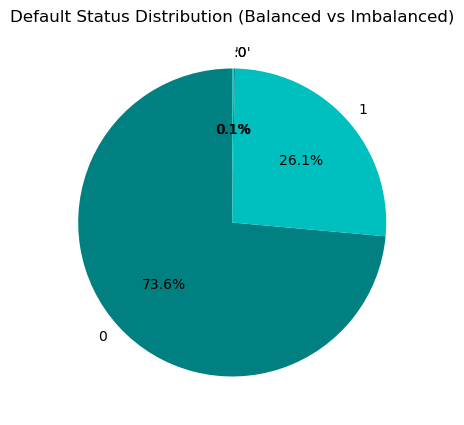

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("LoanData_Raw_v1.0.csv")

target_col = "default"

counts = df[target_col].value_counts()
percentages = (counts / len(df)) * 100

print("Counts:\n", counts)
print("\nPercentages:\n", percentages)

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90, colors=["teal","c"])

plt.title("Default Status Distribution (Balanced vs Imbalanced)")
plt.show()

### **Summary of *Age, income, debtinc, creddebt, othdebt* column** 
As these coloumn contain continuous numeric values, mean, median, variance, standard deviation can be calculated. Appropriate graph/chart are also shown.

In [40]:
df = pd.read_csv("LoanData_Raw_v1.0.csv")

cols = ["age", "income", "debtinc", "creddebt", "othdebt"]

stats = pd.DataFrame({
    "Mean": df[cols].mean(),
    "Median": df[cols].median(),
    "Variance": df[cols].var(),
    "StdDev": df[cols].std()
}).round(3)

print("==== Summary Statistics for Continuous Columns ====")
print(stats)


==== Summary Statistics for Continuous Columns ====
            Mean  Median  Variance  StdDev
age       34.899  34.000    78.532   8.862
income    45.744  34.000  1401.834  37.441
debtinc   10.261   8.600    46.611   6.827
creddebt   1.554   0.855     4.483   2.117
othdebt    3.058   1.988    10.808   3.288


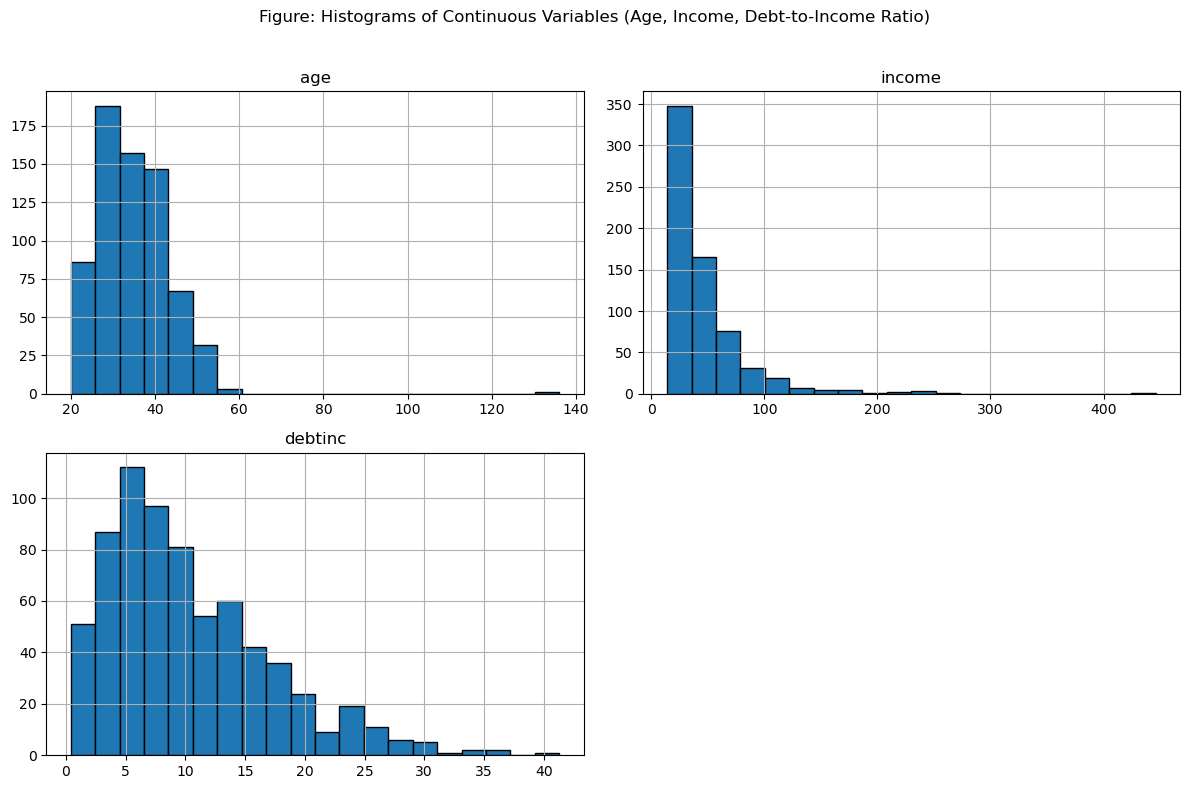

In [48]:
# === Figure 3: Histograms of Continuous Variables ===
import pandas as pd
import matplotlib.pyplot as plt

# ---- Select continuous columns for histogram ----
cont_cols = ["age", "income", "debtinc"]

# ---- Create histograms ----
df[cont_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Figure: Histograms of Continuous Variables (Age, Income, Debt-to-Income Ratio)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **Summary of *discrete value* column** 

=== 'ed' Column Frequency Table ===
   Education_Level  Frequency  Percentage
0              1.0        363       51.86
1              2.0        192       27.43
2              3.0         84       12.00
3              4.0         36        5.14
4              NaN         20        2.86
5              5.0          5        0.71


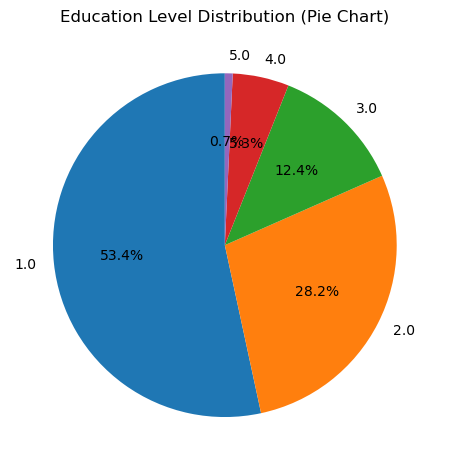

In [50]:
# === Analysis of 'ed' column ===
import pandas as pd
import matplotlib.pyplot as plt

# ---- Load dataset ----
df = pd.read_csv("LoanData_Raw_v1.0.csv")

# ---- Frequency & percentage table for 'ed' ----
vc = df["ed"].value_counts(dropna=False)
pct = (vc / len(df) * 100).round(2)
freq_table = pd.DataFrame({"Education_Level": vc.index, 
                           "Frequency": vc.values, 
                           "Percentage": pct.values})

print("=== 'ed' Column Frequency Table ===")
print(freq_table)

# ---- Pie chart ----
plt.figure()
df["ed"].value_counts().sort_index().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Education Level Distribution (Pie Chart)")
plt.ylabel("")
plt.tight_layout()
plt.show()



### ***CORELATION HEATMAP* WITH EVERY COLUMN** 

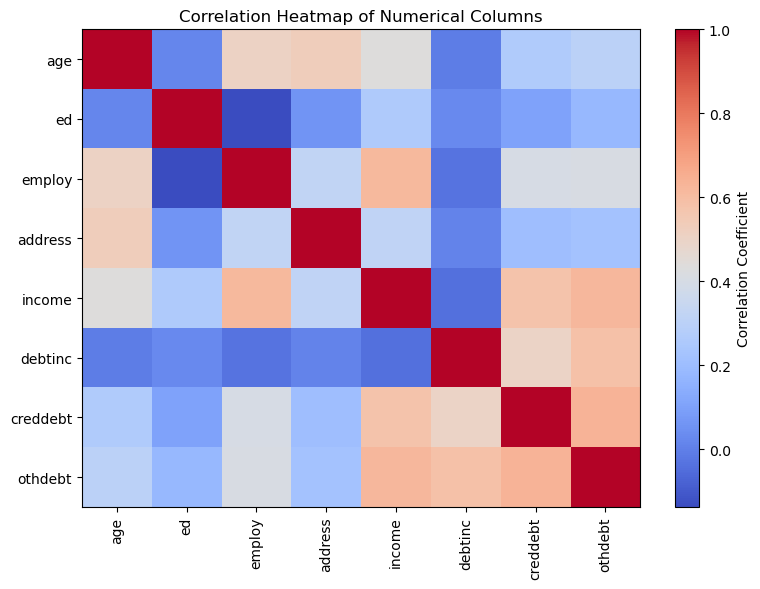

In [52]:
# === Correlation Heatmap of Numerical Columns ===
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("LoanData_Raw_v1.0.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# ---- Select only numerical columns ----
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# ---- Compute correlation matrix ----
corr = df[num_cols].corr()

# ---- Plot heatmap using matplotlib ----
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest", aspect="auto")
plt.colorbar(label="Correlation Coefficient")

# Add axis labels
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap of Numerical Columns")

plt.tight_layout()
plt.show()


# **CONCLUSION**

In conclusion, the analysis of the Loans and Liability dataset provides important insights into the financial characteristics of loan applicants and how these relate to the likelihood of default. The dataset contains both numerical and categorical variables, with most features such as age, income, and debt measures being continuous, while the target variable `default` is categorical. One of the main findings is that the dataset is imbalanced, as non-defaulters make up nearly three-quarters of the records, while defaulters account for about one-quarter. This imbalance is significant because models trained on the data may perform well in terms of accuracy but fail to properly identify defaulters, which are the cases of greatest interest. Missing values were observed in the ‘age’, ‘ed’, and ‘income’ columns, and these can be addressed using median imputation for numerical features and mode imputation for categorical features to preserve the dataset’s size and integrity. Visualizations such as histograms and boxplots revealed a wide spread of income and debt values, including some clear outliers, while the correlation heatmap showed that higher income is generally linked with higher credit and other debt. Overall, the dataset is rich and suitable for predictive modeling, but careful handling of missing values, class imbalance, and outliers is necessary. With these considerations, it can provide meaningful insights into how financial and demographic metrics influence loan approval and default risk.